# Задача 2

Для умов опалення приватної оселі через циркуляцію нагрітої води в замкненому контурі,
порівняти витрати на енергоносії в умовах існуючих цін (з'ясувати) при використанні природного газу та електрики.
Для інженерного розрахунку вважати, що склад природного газу 100% метан, а ККД процесу нагріву води в обох випадках однаковий.
Теплоту згоряння метану взяти в довіднику.

## Вступ

Питання енергоефективності та оптимального вибору енергоносіїв для опалення приватних осель є надзвичайно актуальним у контексті постійних змін на енергетичному ринку України. Дане дослідження присвячене порівняльному аналізу економічної доцільності використання природного газу та електроенергії для опалення приватної оселі в умовах існуючих цін на енергоносії. Особлива увага приділяється розрахунку вартості генерації однакової кількості теплової енергії за допомогою різних енергоносіїв з урахуванням їхніх теплотворних характеристик та ефективності систем опалення.


## Теоретичні основи

### Термодинамічні аспекти процесів опалення

Для коректного порівняння енергоносіїв необхідно враховувати їхні фізичні властивості, зокрема теплоту згоряння. Теплота згоряння – це кількість теплової енергії, що виділяється при повному згорянні одиниці маси або об'єму палива за нормальних умов.

Для природного газу теплота згоряння зазвичай вимірюється в МДж/м³. Відповідно до наданих даних, теплота згоряння чистого метану становить:

$$Q_{\text{метан}} = 50.03 \text{ МДж/м³}$$

Для природного газу, який містить домішки інших компонентів, теплота згоряння нижча і становить:

$$Q_{\text{прир.газ}} = 33.50 \text{ МДж/м³}$$

In [47]:
# Теплота згоряння
METHANE_HEAT_VALUE = 50.03  # МДж/м³ (для чистого метану)
NATURAL_GAS_HEAT_VALUE = 33.50  # МДж/м³ (для природного газу)

### Коефіцієнт корисної дії (ККД)

Важливою характеристикою системи опалення є коефіцієнт корисної дії (ККД), який визначає частку енергії, що ефективно перетворюється на корисне тепло. Для різних типів опалювальних систем ККД може суттєво відрізнятися:

$$\eta = \frac{Q_{\text{корисне}}}{Q_{\text{загальне}}}$$

де $\eta$ – коефіцієнт корисної дії системи опалення, $Q_{\text{корисне}}$ – корисна теплова енергія, $Q_{\text{загальне}}$ – загальна затрачена енергія.

У нашому дослідженні прийнято такі значення ККД:
- ККД газового котла: $\eta_{\text{газ}} = 0.9$ (90%)
- ККД електричного котла: $\eta_{\text{електр}} = 0.9$ (90%)
- ККД системи в цілому (з урахуванням втрат у трубах тощо): $\eta_{\text{система}} = 0.9$ (90%)

In [48]:
# ККД
GAS_BOILER_EFFICIENCY = 0.9  # 90% ККД газового котла
ELECTRIC_BOILER_EFFICIENCY = 0.9  # 90% ККД електричного котла
SYSTEM_EFFICIENCY = 0.9  # 90% ККД системи опалення (втрати у трубах тощо)

### Перетворення енергетичних одиниць

Для коректного порівняння різних енергоносіїв необхідно перевести всі енергетичні величини до єдиної системи одиниць. У даному дослідженні використовується коефіцієнт перетворення мегаджоулів у кіловат-години:

$$1 \text{ МДж} = 0.2778 \text{ кВт·год}$$

In [49]:
# Константи для перетворення одиниць
MJ_TO_KWH = 0.2778  # 1 МДж = 0.2778 кВт·год

### Тепловий насос та коефіцієнт перетворення енергії (COP)

Тепловий насос – це пристрій, який переносить теплову енергію від нижчого потенціалу до вищого за допомогою затрати зовнішньої роботи. Ефективність теплового насоса характеризується коефіцієнтом перетворення енергії (COP - Coefficient of Performance):

$$COP = \frac{Q_{\text{теплова}}}{W_{\text{електрична}}}$$

де $Q_{\text{теплова}}$ – отримана теплова енергія, $W_{\text{електрична}}$ – затрачена електрична енергія.

Для сучасних теплових насосів COP може варіюватися від 2.5 до 5.0 і вище, залежно від типу теплового насоса та умов експлуатації.

## Розв'язання

### Вхідні дані

Для проведення порівняльного аналізу використано наступні вхідні дані:

1. Тарифи на енергоносії:
   - Електроенергія: 4.32 грн/кВт·год
   - Природний газ: 7.96 грн/м³

2. Теплотворна здатність палива:
   - Метану: 50.03 МДж/м³
   - Природного газу: 33.50 МДж/м³

3. Коефіцієнти корисної дії:
   - Газового котла: 90%
   - Електричного котла: 90%
   - Системи опалення в цілому: 90%

4. Потреба в тепловій енергії: 1000 кВт·год

In [50]:
# Константи для розрахунків (актуальні дані 2025 року)
ELECTRICITY_PRICE = 4.32  # грн/кВт·год
GAS_PRICE = 7.96  # грн/м³

# Теплова потреба будинку для розрахунку
HEAT_DEMAND = 1000  # кВт·год тепла за місяць

### Методика розрахунку

Розрахунок витрат на різні енергоносії здійснювався за наступним алгоритмом:

1. Обчислення енергетичного еквіваленту 1 м³ газу (в кВт·год):
   $$E_{\text{газ/м³}} = Q_{\text{газ}} \cdot 0.2778$$

2. Визначення ефективної енергії з урахуванням ККД:
   $$E_{\text{ефект}} = E_{\text{газ/м³}} \cdot \eta_{\text{газ}} \cdot \eta_{\text{система}}$$

3. Розрахунок необхідного об'єму газу для задоволення потреби в теплі:
   $$V_{\text{газ}} = \frac{E_{\text{потреба}}}{E_{\text{ефект}}}$$

4. Обчислення вартості газу:
   $$C_{\text{газ}} = V_{\text{газ}} \cdot T_{\text{газ}}$$

5. Розрахунок необхідної кількості електроенергії з урахуванням ККД:
   $$E_{\text{електр}} = \frac{E_{\text{потреба}}}{\eta_{\text{електр}} \cdot \eta_{\text{система}}}$$

6. Обчислення вартості електроенергії:
   $$C_{\text{електр}} = E_{\text{електр}} \cdot T_{\text{електр}}$$

7. Порівняння витрат та визначення відносної ефективності:
   $$\text{Коефіцієнт} = \frac{C_{\text{електр}}}{C_{\text{газ}}}$$

8. Для теплового насоса додатково розраховується витрата електроенергії з урахуванням COP:
   $$E_{\text{тн}} = \frac{E_{\text{потреба}}}{COP \cdot \eta_{\text{система}}}$$

9. Визначення критичного значення COP, при якому електричне опалення з тепловим насосом стає економічно вигіднішим за газове:
   $$COP_{\text{крит}} = \frac{E_{\text{електр}} \cdot T_{\text{електр}}}{C_{\text{газ}}}$$

### Розрахунок енергетичних характеристик метану

Розрахуємо енергетичний еквівалент 1 м³ метану:

In [51]:
# Розрахунок енергії від 1 м³ метану
methane_energy_per_m3 = METHANE_HEAT_VALUE * MJ_TO_KWH  # кВт·год/м³
print(f"Енергія від 1 м³ метану: {methane_energy_per_m3:.2f} кВт·год")

Енергія від 1 м³ метану: 13.90 кВт·год


$$E_{\text{метан/м³}} = Q_{\text{метан}} \cdot 0.2778 = 50.03 \text{ МДж/м³} \cdot 0.2778 \text{ кВт·год/МДж} = 13.90 \text{ кВт·год/м³}$$

З урахуванням ККД газового котла та системи опалення:

In [52]:
methane_energy_with_efficiency = methane_energy_per_m3 * GAS_BOILER_EFFICIENCY * SYSTEM_EFFICIENCY  # кВт·год/м³ з урахуванням ККД
print(f"Енергія від 1 м³ метану з урахуванням ККД: {methane_energy_with_efficiency:.2f} кВт·год")

Енергія від 1 м³ метану з урахуванням ККД: 11.26 кВт·год


$$E_{\text{метан/ефект}} = E_{\text{метан/м³}} \cdot \eta_{\text{газ}} \cdot \eta_{\text{система}} = 13.90 \text{ кВт·год/м³} \cdot 0.9 \cdot 0.9 = 11.26 \text{ кВт·год/м³}$$

Для забезпечення 1000 кВт·год теплової енергії потрібно:

In [53]:
# Розрахунок кількості метану для забезпечення теплової потреби
methane_volume_needed = HEAT_DEMAND / methane_energy_with_efficiency  # м³
print(f"Кількість метану для забезпечення {HEAT_DEMAND} кВт·год тепла: {methane_volume_needed:.2f} м³")

Кількість метану для забезпечення 1000 кВт·год тепла: 88.83 м³


$$V_{\text{метан}} = \frac{E_{\text{потреба}}}{E_{\text{ефект}}} = \frac{1000 \text{ кВт·год}}{11.26 \text{ кВт·год/м³}} = 88.83 \text{ м³}$$

Вартість метану:

In [54]:
# Розрахунок витрат на газ
methane_cost = methane_volume_needed * GAS_PRICE  # грн
print(f"Витрати на метан: {methane_cost:.2f} грн")

Витрати на метан: 707.07 грн


$$C_{\text{метан}} = V_{\text{метан}} \cdot T_{\text{газ}} = 88.83 \text{ м³} \cdot 7.96 \text{ грн/м³} = 707.07 \text{ грн}$$

### Розрахунок енергетичних характеристик природного газу

Розрахуємо енергетичний еквівалент 1 м³ природного газу:

In [55]:
# Розрахунок енергії від 1 м³ природного газу
natural_gas_energy_per_m3 = NATURAL_GAS_HEAT_VALUE * MJ_TO_KWH  # кВт·год/м³
print(f"Енергія від 1 м³ природного газу: {natural_gas_energy_per_m3:.2f} кВт·год")

Енергія від 1 м³ природного газу: 9.31 кВт·год


$$E_{\text{прир.газ/м³}} = Q_{\text{прир.газ}} \cdot 0.2778 = 33.50 \text{ МДж/м³} \cdot 0.2778 \text{ кВт·год/МДж} = 9.31 \text{ кВт·год/м³}$$

З урахуванням ККД газового котла та системи опалення:

In [56]:
natural_gas_energy_with_efficiency = natural_gas_energy_per_m3 * GAS_BOILER_EFFICIENCY * SYSTEM_EFFICIENCY  # кВт·год/м³ з урахуванням ККД
print(f"Енергія від 1 м³ природного газу з урахуванням ККД: {natural_gas_energy_with_efficiency:.2f} кВт·год")

Енергія від 1 м³ природного газу з урахуванням ККД: 7.54 кВт·год


$$E_{\text{прир.газ/ефект}} = E_{\text{прир.газ/м³}} \cdot \eta_{\text{газ}} \cdot \eta_{\text{система}} = 9.31 \text{ кВт·год/м³} \cdot 0.9 \cdot 0.9 = 7.54 \text{ кВт·год/м³}$$

Для забезпечення 1000 кВт·год теплової енергії потрібно:

In [57]:
# Розрахунок кількості природного газу для забезпечення теплової потреби
natural_gas_volume_needed = HEAT_DEMAND / natural_gas_energy_with_efficiency  # м³
print(f"Кількість природного газу для забезпечення {HEAT_DEMAND} кВт·год тепла: {natural_gas_volume_needed:.2f} м³")

Кількість природного газу для забезпечення 1000 кВт·год тепла: 132.66 м³


$$V_{\text{прир.газ}} = \frac{E_{\text{потреба}}}{E_{\text{ефект}}} = \frac{1000 \text{ кВт·год}}{7.54 \text{ кВт·год/м³}} = 132.66 \text{ м³}$$

Вартість природного газу:

In [58]:
# Розрахунок витрат на природний газ
natural_gas_cost = natural_gas_volume_needed * GAS_PRICE  # грн
print(f"Витрати на природний газ: {natural_gas_cost:.2f} грн")

Витрати на природний газ: 1055.97 грн


### Розрахунок енергетичних характеристик електричного опалення

Для забезпечення 1000 кВт·год теплової енергії з використанням електричного котла потрібно:

In [59]:
# Розрахунок кількості електроенергії для забезпечення теплової потреби
electricity_needed = HEAT_DEMAND / (ELECTRIC_BOILER_EFFICIENCY * SYSTEM_EFFICIENCY)  # кВт·год
print(f"Кількість електроенергії для забезпечення {HEAT_DEMAND} кВт·год тепла: {electricity_needed:.2f} кВт·год")

Кількість електроенергії для забезпечення 1000 кВт·год тепла: 1234.57 кВт·год


$$E_{\text{електр}} = \frac{E_{\text{потреба}}}{\eta_{\text{електр}} \cdot \eta_{\text{система}}} = \frac{1000 \text{ кВт·год}}{0.9 \cdot 0.9} = 1234.57 \text{ кВт·год}$$

Вартість електроенергії:

In [60]:
# Розрахунок витрат на електроенергію
electricity_cost = electricity_needed * ELECTRICITY_PRICE  # грн
print(f"Витрати на електроенергію: {electricity_cost:.2f} грн")

Витрати на електроенергію: 5333.33 грн


$$C_{\text{електр}} = E_{\text{електр}} \cdot T_{\text{електр}} = 1234.57 \text{ кВт·год} \cdot 4.32 \text{ грн/кВт·год} = 5333.33 \text{ грн}$$

### Порівняльний аналіз енергоносіїв

Результати розрахунків демонструють істотну різницю в вартості опалення різними енергоносіями:

- Витрати на опалення метаном: 707.07 грн
- Витрати на опалення природним газом: 1055.97 грн
- Витрати на опалення електроенергією: 5333.33 грн

Порівняльні коефіцієнти:

In [61]:
# Порівняння витрат
print(f"Природний газ дорожчий за чистий метан у {natural_gas_cost / methane_cost:.2f} рази")

Природний газ дорожчий за чистий метан у 1.49 рази


- Природний газ дорожчий за метан у 1.49 рази

In [62]:
methane_cost_ratio = electricity_cost / methane_cost
print(f"Опалення електроенергією дорожче за метан у {methane_cost_ratio:.2f} рази")

Опалення електроенергією дорожче за метан у 7.54 рази


- Електричне опалення дорожче за метан у 7.54 рази

In [63]:
natural_gas_cost_ratio = electricity_cost / natural_gas_cost
print(f"Опалення електроенергією дорожче за природний газ у {natural_gas_cost_ratio:.2f} рази")

Опалення електроенергією дорожче за природний газ у 5.05 рази


- Електричне опалення дорожче за природний газ у 5.05 рази

### Аналіз ефективності використання теплового насоса

При використанні теплового насоса вартість опалення електроенергією суттєво зменшується. Розрахунки проведені для різних значень COP:

In [64]:
# Аналіз використання теплового насоса
print("===== Аналіз використання теплового насоса =====")
heat_pump_results = []
for cop in [2.5, 3.0, 3.5, 4.0, 4.5]:
    electricity_with_heat_pump = HEAT_DEMAND / (cop * SYSTEM_EFFICIENCY)
    cost_with_heat_pump = electricity_with_heat_pump * ELECTRICITY_PRICE
    methane_ratio = cost_with_heat_pump / methane_cost
    natural_gas_ratio = cost_with_heat_pump / natural_gas_cost

    result = {
        'cop': cop,
        'cost': cost_with_heat_pump,
        'methane_ratio': methane_ratio,
        'natural_gas_ratio': natural_gas_ratio
    }
    heat_pump_results.append(result)

    print(f"COP = {cop}:")
    print(f"  Витрати: {cost_with_heat_pump:.2f} грн")
    print(f"  Співвідношення до метану: {methane_ratio:.2f}")
    print(f"  Співвідношення до природного газу: {natural_gas_ratio:.2f}")

===== Аналіз використання теплового насоса =====
COP = 2.5:
  Витрати: 1920.00 грн
  Співвідношення до метану: 2.72
  Співвідношення до природного газу: 1.82
COP = 3.0:
  Витрати: 1600.00 грн
  Співвідношення до метану: 2.26
  Співвідношення до природного газу: 1.52
COP = 3.5:
  Витрати: 1371.43 грн
  Співвідношення до метану: 1.94
  Співвідношення до природного газу: 1.30
COP = 4.0:
  Витрати: 1200.00 грн
  Співвідношення до метану: 1.70
  Співвідношення до природного газу: 1.14
COP = 4.5:
  Витрати: 1066.67 грн
  Співвідношення до метану: 1.51
  Співвідношення до природного газу: 1.01


- При COP = 2.5: 1920.00 грн (в 2.72 рази дорожче за метан, в 1.82 рази дорожче за природний газ)
- При COP = 3.0: 1600.00 грн (в 2.26 рази дорожче за метан, в 1.52 рази дорожче за природний газ)
- При COP = 3.5: 1371.43 грн (в 1.94 рази дорожче за метан, в 1.30 рази дорожче за природний газ)
- При COP = 4.0: 1200.00 грн (в 1.70 рази дорожче за метан, в 1.14 рази дорожче за природний газ)
- При COP = 4.5: 1066.67 грн (в 1.51 рази дорожче за метан, в 1.01 рази дорожче за природний газ)

#### Визначення критичного COP

Критичний COP – це значення, при якому вартість опалення за допомогою теплового насоса стає рівною вартості опалення газом.

In [65]:
# Знаходження критичного COP для метану та природного газу
import numpy as np
print("\n===== Знаходження критичного COP =====")
cop_values = np.arange(1, 15.1, 0.1)

# Для метану
methane_critical_cop_found = False
for cop in cop_values:
    electricity_with_heat_pump = HEAT_DEMAND / (cop * SYSTEM_EFFICIENCY)
    cost_with_heat_pump = electricity_with_heat_pump * ELECTRICITY_PRICE
    if cost_with_heat_pump < methane_cost:
        print(f"Критичний COP для метану: {cop:.1f}")
        methane_critical_cop_found = True
        break

if not methane_critical_cop_found:
    print("При COP до 15 тепловий насос не стає вигіднішим за метан")

# Для природного газу
natural_gas_critical_cop_found = False
for cop in cop_values:
    electricity_with_heat_pump = HEAT_DEMAND / (cop * SYSTEM_EFFICIENCY)
    cost_with_heat_pump = electricity_with_heat_pump * ELECTRICITY_PRICE
    if cost_with_heat_pump < natural_gas_cost:
        print(f"Критичний COP для природного газу: {cop:.1f}")
        natural_gas_critical_cop_found = True
        break

if not natural_gas_critical_cop_found:
    print("При COP до 15 тепловий насос не стає вигіднішим за природний газ")


===== Знаходження критичного COP =====
Критичний COP для метану: 6.8
Критичний COP для природного газу: 4.6


 Розрахунки показали:

- Критичний COP для метану: 6.8
- Критичний COP для природного газу: 4.6

Це означає, що при досягненні теплових насосів з COP ≥ 6.8, електричне опалення стає економічно вигіднішим за опалення чистим метаном, а при COP ≥ 4.6 – вигіднішим за опалення природним газом.

## Візуалізація результатів

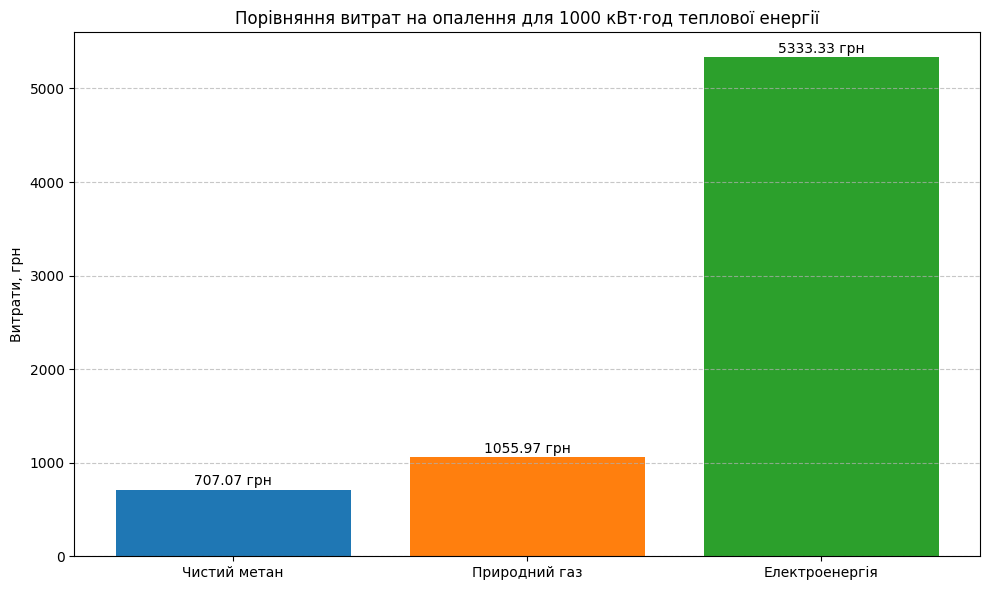

In [67]:
# Порівняння витрат на різні енергоносії
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
costs = [methane_cost, natural_gas_cost, electricity_cost]
labels = ['Чистий метан', 'Природний газ', 'Електроенергія']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.bar(labels, costs, color=colors)
plt.ylabel('Витрати, грн')
plt.title('Порівняння витрат на опалення для 1000 кВт·год теплової енергії')

for i, cost in enumerate(costs):
    plt.text(i, cost + 50, f'{cost:.2f} грн', ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

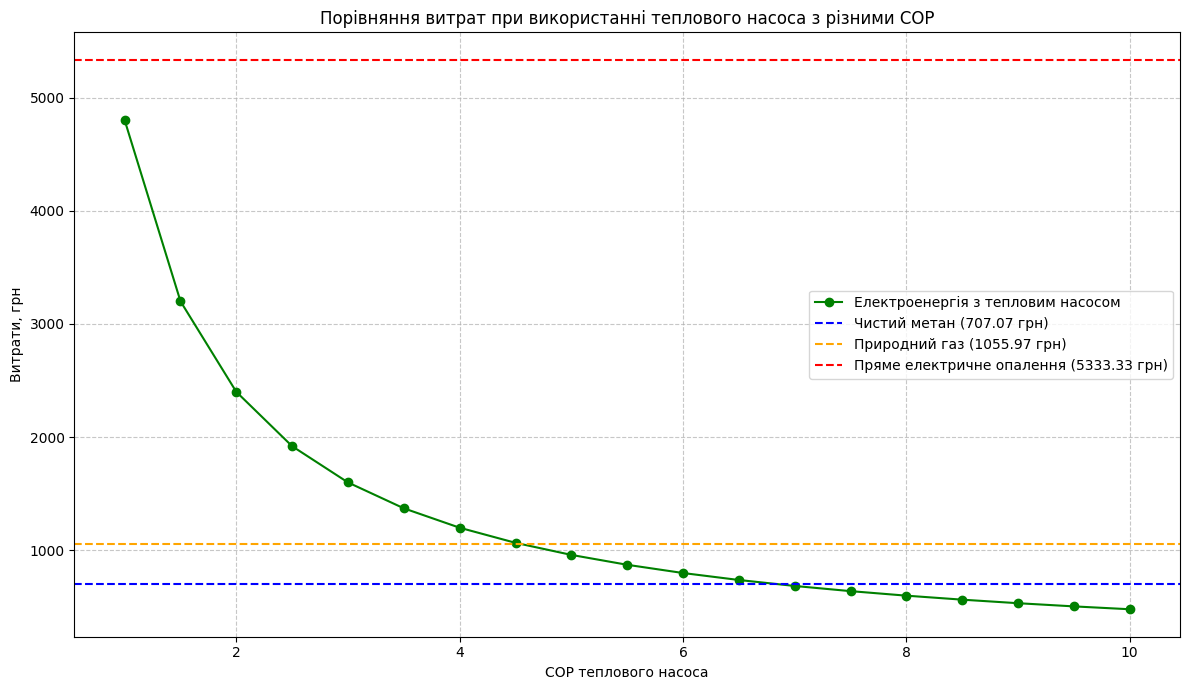

In [68]:
# Графік залежності витрат від COP теплового насоса
plt.figure(figsize=(12, 7))
cop_range = np.arange(1, 10.1, 0.5)
heat_pump_costs = []

for cop in cop_range:
    electricity_with_heat_pump = HEAT_DEMAND / (cop * SYSTEM_EFFICIENCY)
    cost_with_heat_pump = electricity_with_heat_pump * ELECTRICITY_PRICE
    heat_pump_costs.append(cost_with_heat_pump)

plt.plot(cop_range, heat_pump_costs, 'g-', marker='o', label='Електроенергія з тепловим насосом')
plt.axhline(y=methane_cost, color='b', linestyle='--',
            label=f'Чистий метан ({methane_cost:.2f} грн)')
plt.axhline(y=natural_gas_cost, color='orange', linestyle='--',
            label=f'Природний газ ({natural_gas_cost:.2f} грн)')
plt.axhline(y=electricity_cost, color='r', linestyle='--',
            label=f'Пряме електричне опалення ({electricity_cost:.2f} грн)')

plt.xlabel('COP теплового насоса')
plt.ylabel('Витрати, грн')
plt.title('Порівняння витрат при використанні теплового насоса з різними COP')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [71]:
# Додавання нового імпорту для роботи з таблицями
import pandas as pd

# Створення таблиці для порівняння трьох енергоносіїв
comparison_data = {
    'Параметр': ['Енергоносій', 'Теплота згоряння', 'Вартість 1 одиниці', 'Кількість для 1000 кВт·год тепла', 'Загальні витрати', 'Відносна вартість'],
    'Чистий метан': ['Метан (100%)', f'{METHANE_HEAT_VALUE:.2f} МДж/м³', f'{GAS_PRICE:.2f} грн/м³',
                     f'{methane_volume_needed:.2f} м³', f'{methane_cost:.2f} грн', '1'],
    'Природний газ': ['Природний газ', f'{NATURAL_GAS_HEAT_VALUE:.2f} МДж/м³', f'{GAS_PRICE:.2f} грн/м³',
                      f'{natural_gas_volume_needed:.2f} м³', f'{natural_gas_cost:.2f} грн',
                      f'{natural_gas_cost / methane_cost:.2f}'],
    'Електроенергія': ['Електрика', 'Н/Д', f'{ELECTRICITY_PRICE:.2f} грн/кВт·год',
                       f'{electricity_needed:.2f} кВт·год', f'{electricity_cost:.2f} грн',
                       f'{electricity_cost / methane_cost:.2f}']
}

# Створення DataFrame з даними
comparison_df = pd.DataFrame(comparison_data)

comparison_df

,Параметр,Чистий метан,Природний газ,Електроенергія
0,Енергоносій,Метан (100%),Природний газ,Електрика
1,Теплота згоряння,50.03 МДж/м³,33.50 МДж/м³,Н/Д
2,Вартість 1 одиниці,7.96 грн/м³,7.96 грн/м³,4.32 грн/кВт·год
3,Кількість для 1000 кВт·год тепла,88.83 м³,132.66 м³,1234.57 кВт·год
4,Загальні витрати,707.07 грн,1055.97 грн,5333.33 грн
5,Відносна вартість,1,1.49,7.54


## Результати

Проведений аналіз демонструє значну економічну перевагу використання газового опалення порівняно з прямим електричним опаленням за поточних тарифів на енергоносії. Електричне опалення практично в 7.54 рази дорожче за опалення чистим метаном та в 5.05 разів дорожче за опалення природним газом.

Треба відзначити різницю в економічній ефективності між чистим метаном і природним газом. Природний газ вихожить дорожчим за метан у 1.49 рази, що пояснюється значною різницею в теплоті згоряння: 50.03 МДж/м³ для метану проти 33.50 МДж/м³ для природного газу.

Важливо зауважити, що в нашому дослідженні ККД електричного котла прийнято на рівні 90%, що відповідає реальним умовам експлуатації з урахуванням можливих втрат. Хоча теоретично електричні котли мають вищій ККД, на практиці різні фактори можуть знижувати їхню ефективність.

Впровадження теплового насоса суттєво підвищує економічну привабливість електричного опалення. При досягненні COP = 4.5 вартість опалення тепловим насосом наближається до вартості природного газу (співвідношення 1.01).

Однак критичний аналіз показує, що для досягнення паритету з чистим метаном необхідний тепловий насос з надзвичайно високим COP = 6.8, що перевищує характеристики більшості доступних на ринку моделей. Натомість, для досягнення паритету з природним газом достатньо теплового насоса з COP = 4.6, що є більш реалістичним показником для сучасних високоефективних моделей.

Важливо зазначити, що результати дослідження ґрунтуються на поточних тарифах на енергоносії та можуть суттєво змінюватися при їх коригуванні. Крім того, на вибір системи опалення впливають не лише економічні фактори, але й екологічні аспекти, доступність енергоносіїв, наявність інфраструктури та інші чинники.

## Висновки

На підставі проведеного дослідження можна зробити наступні висновки:

1. Опалення природним газом за поточних тарифів суттєво економічно вигідніше порівняно з прямим електричним опаленням. Вартість опалення електроенергією перевищує вартість опалення природним газом у 5.05 рази.

2. Істотна різниця у вартості опалення чистим метаном та природним газом (у 1.49 рази) пояснюється значною різницею у їхній теплотворній здатності.

3. Використання теплового насоса значно підвищує економічну ефективність електричного опалення. При досягненні COP = 4.6 вартість опалення тепловим насосом стає рівною вартості опалення природним газом.

4. Для досягнення економічної ефективності, рівної опаленню чистим метаном, необхідний тепловий насос з COP = 6.8, що є технічно складним завданням для сучасних систем.

5. При виборі оптимальної системи опалення необхідно враховувати не лише економічні фактори, але й екологічні, технічні та інфраструктурні аспекти.

6. З огляду на постійні зміни тарифів на енергоносії, періодичне оновлення подібних розрахунків є необхідним для прийняття обґрунтованих рішень щодо вибору або модернізації системи опалення.

Отримані результати можуть бути використані як при індивідуальному виборі системи опалення для приватної оселі, так і при формуванні рекомендацій щодо енергоефективності на рівні об'єднаних територіальних громад та регіонів.